# Managing Data Files and Plotting with Pandas

## 1. Download / Read / Write Dataset Files

In [8]:
import geopandas as gpd
import os

# Create the data directories
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

# Download some data from Natural Earth
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

# The data utilities above are available in utils.py

download('https://naciscdn.org/naturalearth/10m/cultural/' + 
         'ne_10m_populated_places_simple.zip')

file = 'ne_10m_populated_places_simple.zip'
filepath = os.path.join(data_folder, file)
places = gpd.read_file(filepath)

# Check out what is here
keys = places.keys()
print(keys)

Index(['scalerank', 'natscale', 'labelrank', 'featurecla', 'name', 'namepar',
       'namealt', 'nameascii', 'adm0cap', 'capalt', 'capin', 'worldcity',
       'megacity', 'sov0name', 'sov_a3', 'adm0name', 'adm0_a3', 'adm1name',
       'iso_a2', 'note', 'latitude', 'longitude', 'pop_max', 'pop_min',
       'pop_other', 'rank_max', 'rank_min', 'meganame', 'ls_name', 'min_zoom',
       'ne_id', 'geometry'],
      dtype='object')


In [9]:
capitals = places[places['adm0cap'] == 1]

print(capitals)

# Write a subset of the data to a .gpkg (handles vector/raster)
output_file = 'capitals.gpkg'
output_path = os.path.join(output_folder, output_file)
capitals.to_file(driver='GPKG', filename=output_path)

      scalerank  natscale  labelrank       featurecla          name namepar  \
880           8        10        3.0  Admin-0 capital  Vatican City     NaN   
4828          7        20        0.0  Admin-0 capital    San Marino     NaN   
4833          7        20        0.0  Admin-0 capital         Vaduz     NaN   
5012          6        30        8.0  Admin-0 capital    Luxembourg     NaN   
6178          6        30        0.0  Admin-0 capital       Palikir     NaN   
...         ...       ...        ...              ...           ...     ...   
7330          0       600        3.0  Admin-0 capital         Cairo     NaN   
7332          0       600        2.0  Admin-0 capital         Tokyo     NaN   
7334          0       600        3.0  Admin-0 capital         Paris     NaN   
7335          0       600        3.0  Admin-0 capital      Santiago     NaN   
7340          0       600        0.0  Admin-0 capital     Singapore     NaN   

         namealt     nameascii  adm0cap  capalt  ..

## 2. Create Charts with Pandas

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Download data
files = [
  '2020-01-metropolitan-street.csv',
  '2020-02-metropolitan-street.csv',
  '2020-03-metropolitan-street.csv',
  '2020-04-metropolitan-street.csv',
  '2020-05-metropolitan-street.csv',
  '2020-06-metropolitan-street.csv',
  '2020-07-metropolitan-street.csv',
  '2020-08-metropolitan-street.csv',
  '2020-09-metropolitan-street.csv',
  '2020-10-metropolitan-street.csv',
  '2020-11-metropolitan-street.csv',
  '2020-12-metropolitan-street.csv'
]

data_url = 'https://github.com/spatialthoughts/python-dataviz-web/raw/main/data/crime/'

for f in files:
  url = os.path.join(data_url + f)
  download(url)

# Merge the available data frames
dataframe_list = []

for f in files:
    filepath = os.path.join(data_folder, f)
    df = pd.read_csv(filepath)
    dataframe_list.append(df)

merged_df = pd.concat(dataframe_list)

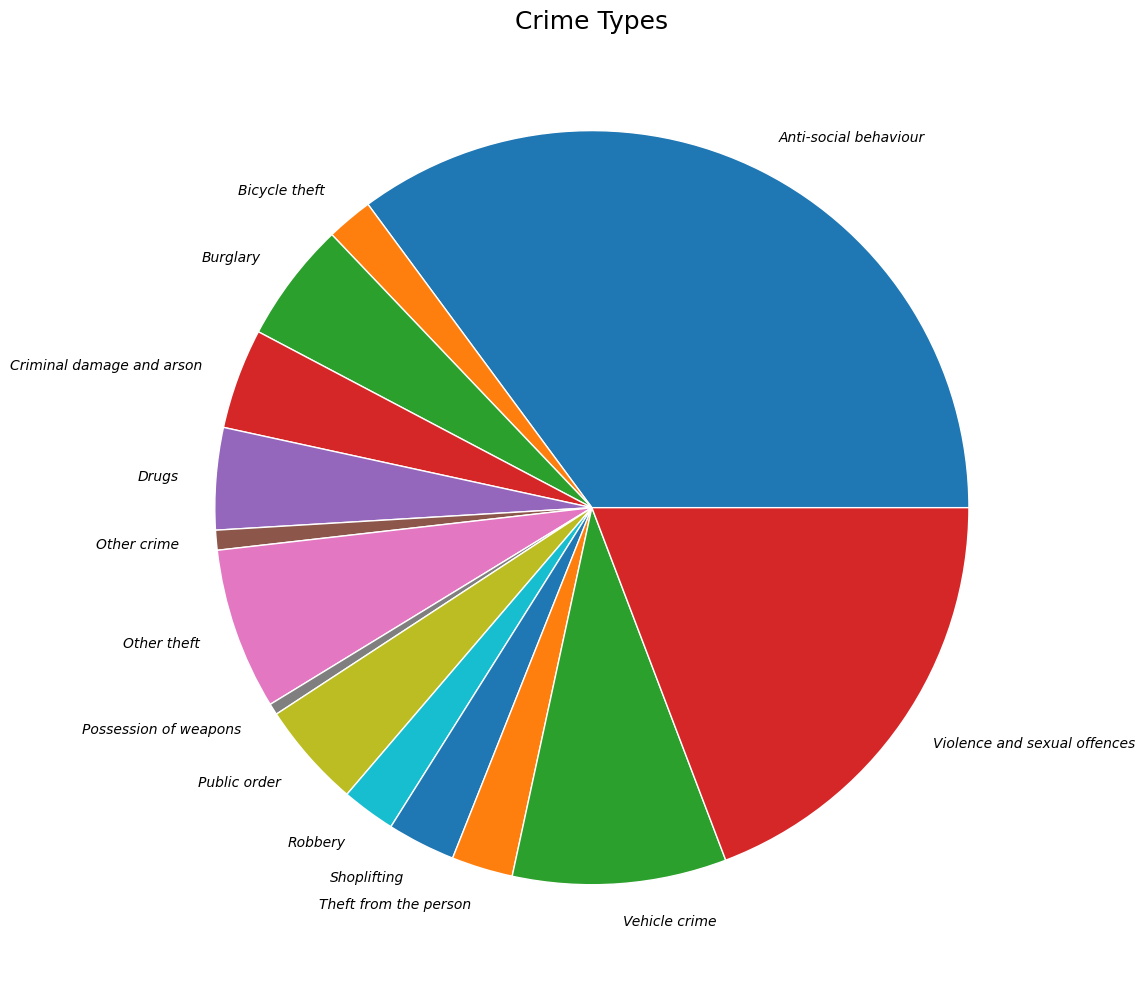

In [12]:
# Use groupby to downselect the dataframe
type_counts = merged_df.groupby('Crime type').size()

# Pie chart
wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
textprops= {'fontsize': 10, 'fontstyle': 'italic'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

type_counts.plot(kind='pie', ax=ax,
                 wedgeprops=wedgeprops,
                 textprops=textprops
                 )

ax.set_title('Crime Types', fontsize = 18)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

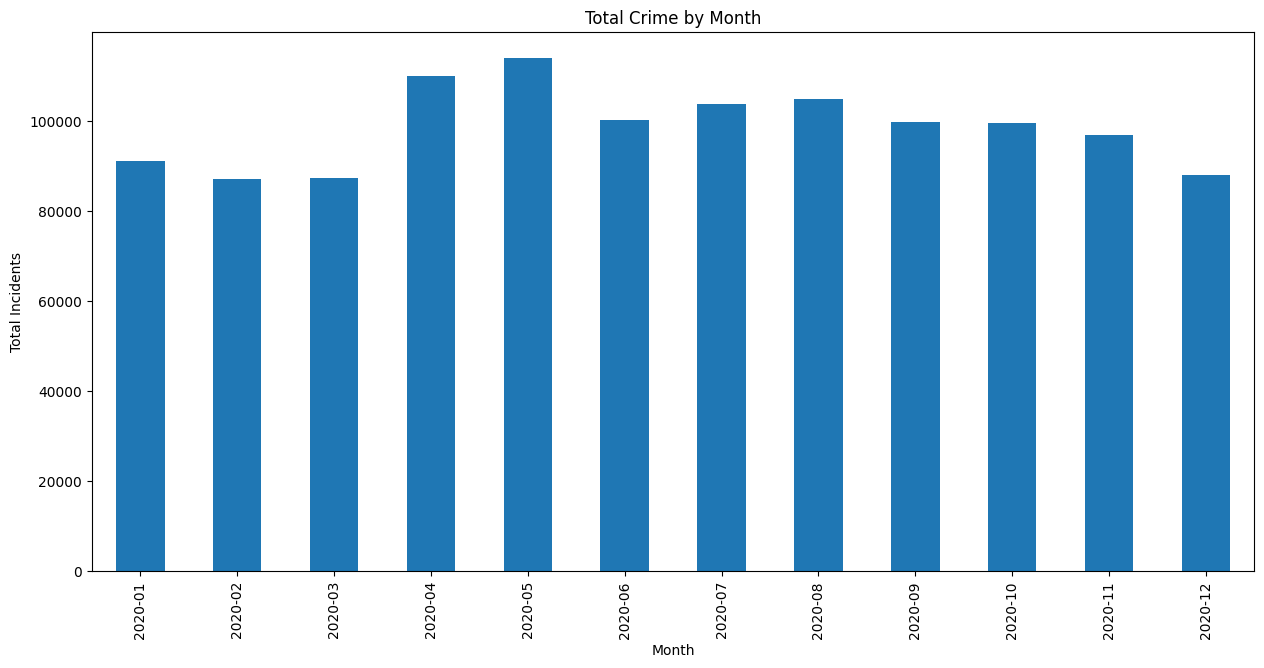

In [13]:
monthly_counts = merged_df.groupby('Month').size()

# Bar chart
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

monthly_counts.plot(kind='bar', ax=ax)

ax.set_title('Total Crime by Month')
ax.set_ylabel('Total Incidents')

plt.show()

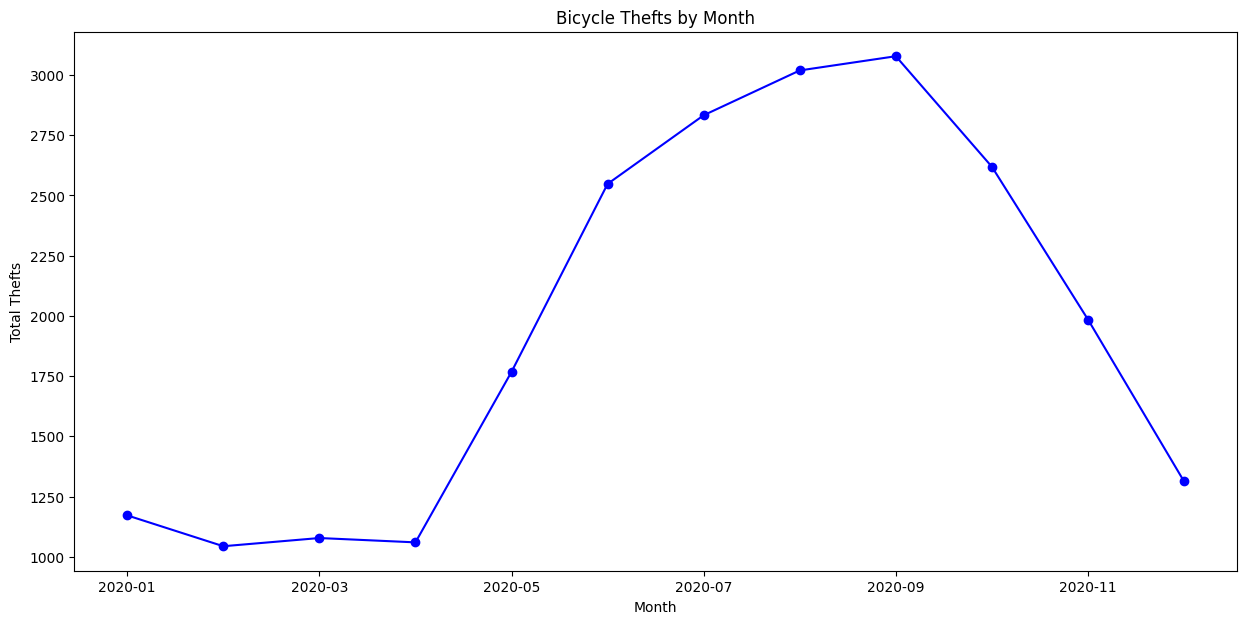

In [14]:
bicycle_thefts = merged_df[merged_df['Crime type'] == 'Bicycle theft']
monthly_counts = bicycle_thefts.groupby('Month').size()

# Line chart
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
monthly_counts.plot(kind='line', ax=ax, color='blue', marker='o')

ax.set_title('Bicycle Thefts by Month')
ax.set_ylabel('Total Thefts')

plt.show()